In [192]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler

In [182]:
data = pd.read_csv('data/preprocessed/train with city.csv')
data

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,TARGET(PRICE_IN_LACS),POSTED_BY_Dealer,...,CITY_Vapi,CITY_Varanasi,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim
0,False,False,2,1300.236407,True,True,12.969910,77.597960,55.0,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,2,1275.000000,True,True,12.274538,76.644605,51.0,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,2,933.159722,True,True,12.778033,77.632191,43.0,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,2,929.921143,True,True,28.642300,77.344500,62.5,False,...,False,False,False,False,False,False,False,False,False,False
4,True,False,2,999.009247,False,True,22.592200,88.484911,60.5,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,False,False,2,1062.134891,True,True,15.866670,74.500000,40.0,False,...,False,False,False,False,False,False,False,False,False,False
29246,False,False,3,2500.000000,True,True,27.140626,78.043277,45.0,False,...,False,False,False,False,False,False,False,False,False,False
29247,False,False,2,1022.641509,True,True,26.928785,75.828002,27.1,True,...,False,False,False,False,False,False,False,False,False,False
29248,False,False,2,927.079009,True,True,12.900150,80.227910,67.0,False,...,False,False,False,False,False,False,False,False,False,False


In [145]:
X = data.drop('TARGET(PRICE_IN_LACS)', axis=1)
y = data['TARGET(PRICE_IN_LACS)']

In [146]:
# Normalisation des données 
numbers_columns = X.select_dtypes(include='number').columns
scaler = StandardScaler()
X[numbers_columns] = scaler.fit_transform(X[numbers_columns])
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,...,CITY_Vapi,CITY_Varanasi,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim
0,False,False,-0.447955,-0.009765,True,True,-1.345015,0.071344,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,-0.447955,-0.009778,True,True,-1.457199,-0.020736,True,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,-0.447955,-0.009958,True,True,-1.375970,0.074650,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,True,-0.447955,-0.009959,True,True,1.183400,0.046864,False,True,...,False,False,False,False,False,False,False,False,False,False
4,True,False,-0.447955,-0.009923,False,True,0.207342,1.122857,True,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,False,False,-0.447955,-0.009890,True,True,-0.877683,-0.227872,False,True,...,False,False,False,False,False,False,False,False,False,False
29246,False,False,0.690913,-0.009136,True,True,0.941136,0.114355,False,True,...,False,False,False,False,False,False,False,False,False,False
29247,False,False,-0.447955,-0.009911,True,True,0.906960,-0.099607,True,False,...,False,False,False,False,False,False,False,False,False,False
29248,False,False,-0.447955,-0.009961,True,True,-1.356269,0.325357,False,True,...,False,False,False,False,False,False,False,False,False,False


In [149]:
#Typage des données 
bool_columns = X.select_dtypes(include='bool').columns
X[bool_columns] = X[bool_columns].astype('float64')
X

,UNDER_CONSTRUCTION,RERA,BHK_NO.,SQUARE_FT,READY_TO_MOVE,RESALE,LONGITUDE,LATITUDE,POSTED_BY_Dealer,POSTED_BY_Owner,...,CITY_Vapi,CITY_Varanasi,CITY_Vidisha,CITY_Vijayawada,CITY_Visakhapatnam,CITY_Visnagar,CITY_Vizianagaram,CITY_Warangal,CITY_Wardha,CITY_Washim
0,0.0,0.0,-0.447955,-0.009765,1.0,1.0,-1.345015,0.071344,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.447955,-0.009778,1.0,1.0,-1.457199,-0.020736,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,-0.447955,-0.009958,1.0,1.0,-1.375970,0.074650,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,1.0,-0.447955,-0.009959,1.0,1.0,1.183400,0.046864,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,-0.447955,-0.009923,0.0,1.0,0.207342,1.122857,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29245,0.0,0.0,-0.447955,-0.009890,1.0,1.0,-0.877683,-0.227872,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29246,0.0,0.0,0.690913,-0.009136,1.0,1.0,0.941136,0.114355,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29247,0.0,0.0,-0.447955,-0.009911,1.0,1.0,0.906960,-0.099607,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
29248,0.0,0.0,-0.447955,-0.009961,1.0,1.0,-1.356269,0.325357,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [150]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [200]:
model = keras.Sequential([
    layers.Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

optimizer = keras.optimizers.legacy.Adam(learning_rate=0.0005)

model.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mean_absolute_error', 'mean_squared_error']
)

early_stopping = EarlyStopping(monitor='val_loss',
                               patience=30,
                               restore_best_weights=True)

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=15, min_lr=0.000001)

history = model.fit(
    X_train, y_train,
    epochs=200,
    batch_size=32,
    validation_split=0.2,
    callbacks=[early_stopping, reduce_lr],
    verbose=1,
)

Epoch 1/200
585/585 [==============================] - 1s 1ms/step - loss: 419582.1875 - mean_absolute_error: 130.7575 - mean_squared_error: 419582.1875 - val_loss: 293949.5000 - val_mean_absolute_error: 115.3650 - val_mean_squared_error: 293949.5000 - lr: 5.0000e-04
Epoch 2/200
585/585 [==============================] - 1s 1ms/step - loss: 380783.7812 - mean_absolute_error: 130.5071 - mean_squared_error: 380783.7812 - val_loss: 291510.1562 - val_mean_absolute_error: 102.2568 - val_mean_squared_error: 291510.1562 - lr: 5.0000e-04
Epoch 3/200
585/585 [==============================] - 1s 1ms/step - loss: 382796.0000 - mean_absolute_error: 124.9802 - mean_squared_error: 382796.0000 - val_loss: 288770.0312 - val_mean_absolute_error: 105.7508 - val_mean_squared_error: 288770.0312 - lr: 5.0000e-04
Epoch 4/200
585/585 [==============================] - 1s 1ms/step - loss: 365635.6250 - mean_absolute_error: 126.3866 - mean_squared_error: 365635.6250 - val_loss: 288534.5000 - val_mean_absolute

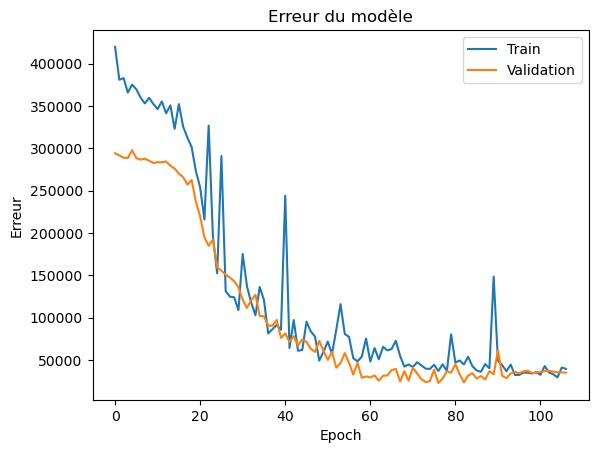

In [201]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Erreur du modèle')
plt.ylabel('Erreur')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

In [202]:
loss, mae, mse = model.evaluate(X_test, y_test, verbose=1)
print('Erreur : ', loss, "\n MAE : ", mae, "\n MSE : ", mse)

183/183 [==============================] - 0s 347us/step - loss: 96423.7031 - mean_absolute_error: 51.5995 - mean_squared_error: 96423.7031
Erreur :  96423.703125 
 MAE :  51.59947204589844 
 MSE :  96423.703125


In [171]:
predictions = model.predict(X_test)

183/183 [==============================] - 0s 330us/step


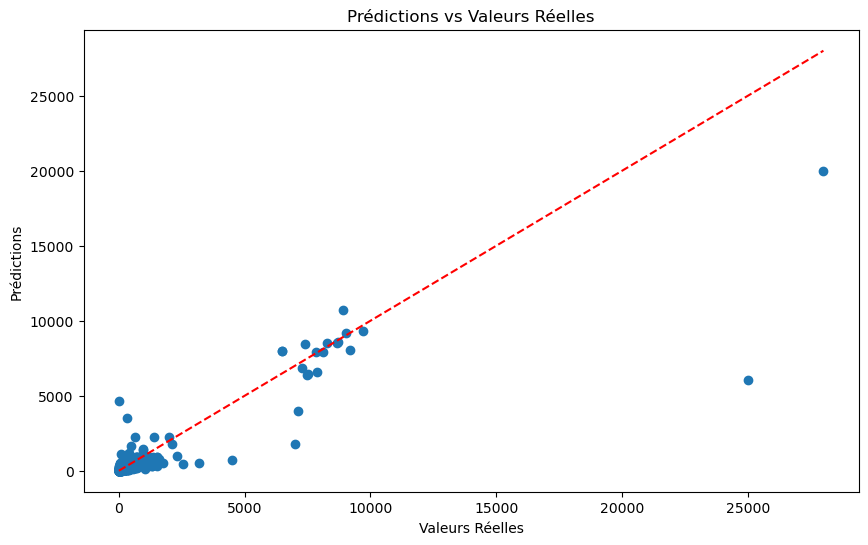

In [172]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, predictions)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Prédictions vs Valeurs Réelles')
plt.show()